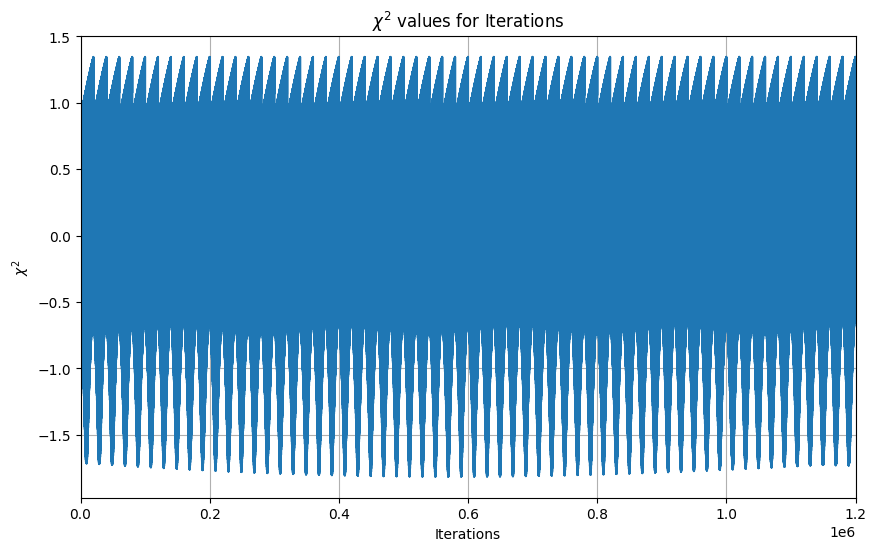

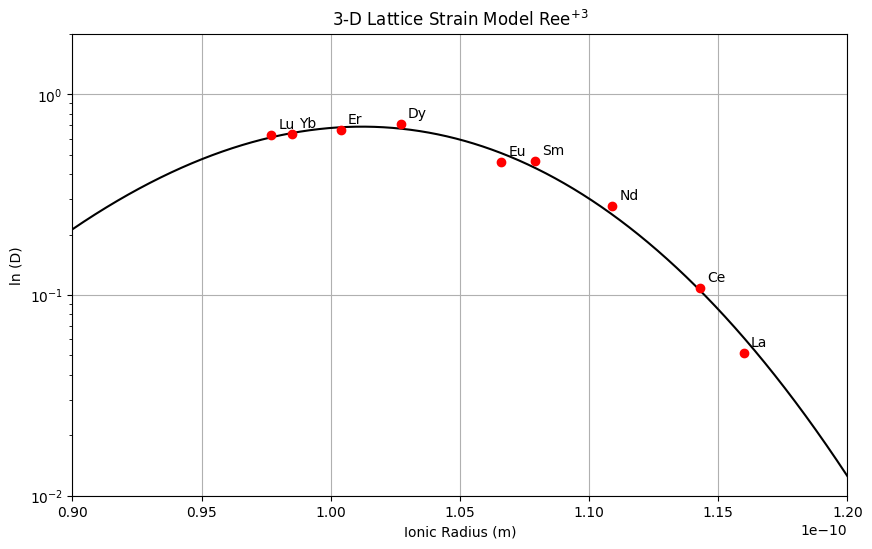

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 3-D Grid Search Lattice Strain Model
# Fits for Young's Modulus, Partition Coefficient and Ionic Radius
# Data fit for univariant +3 Ree Cations
# D values taken from Hauri et al, 1994. For long hour experiments 69 Hr @ 1430 C and 2.5 GPa
# Ionic Radii Taken from Shannon and Prewitt

# Data from Shannon and Prewitt and Hauri et al.
T = 1430 + 273.15  # Temperature of Data from Hauri
Ree_order = ['La', 'Ce', 'Nd', 'Sm', 'Eu', 'Dy', 'Er', 'Yb', 'Lu']  # REE +3
ir = np.array([1.16e-10, 1.143e-10, 1.109e-10, 1.079e-10, 1.066e-10, 1.027e-10, 1.004e-10, 0.985e-10, 0.977e-10])  # Ionic Radius of REE
D_Obs = np.array([0.0515, 0.108, 0.277, 0.462, 0.458, 0.711, 0.66, 0.633, 0.623])  # D Values from Experimental Data

# Strain Lattice Calculation
# Uses equation 2 from Blundy and Wood (1994), Nature
NA = 6.0221409e+23  # Avogadro's Number (1/mol)
R = 8.3144598  # Gas constant (J/(K*mol)), J=(kg*(m^2))/(s^2)
poss_Em = np.linspace(350e9, 400e9, 60)  # Values of Young's Modulus to be tested (Pa)
poss_Do = np.linspace(0.5, 0.9, 200)  # Values of Do to be tested
poss_R = np.linspace(0.8e-10, 1.3e-10, 100)  # Values of Ionic radius to be tested (m)

Perc_err = np.zeros((len(poss_Em), len(poss_Do), len(poss_R)))  # Set Matrix

# Number of Values considered
num_E = len(poss_Em)
num_D = len(poss_Do)
num_R = len(poss_R)
num_ir = len(ir)

# 4 Nested for loop
for i in range(num_E):  # Young's Modulus
    for j in range(num_D):  # D Values
        for k in range(num_R):  # Ionic radius to fit
            # Equation from Blundy and Wood
            Di = poss_Do[j] * np.exp((-4 * np.pi * poss_Em[i] * NA / (R * T)) * 
                                     ((poss_R[k] / 2) * (poss_R[k] - ir)**2 - (1/3 * (poss_R[k] - ir)**3)))
            
            # Calculates the Chi Squared from the data
            Perc_err[i, j, k] = np.sum(((D_Obs - Di)**2) / D_Obs)

# Err is the error and locate holds the locations of the parameters
err = np.min(Perc_err)
locate = np.unravel_index(np.argmin(Perc_err), Perc_err.shape)
x, y, z = locate

# Chi-squared plot
plt.figure(1, figsize=(10, 6))
plt.plot(np.arange(len(Perc_err.flatten())), np.log10(Perc_err.flatten()))
plt.xlabel('Iterations')
plt.ylabel('$\\chi^2$')
plt.title('$\\chi^2$ values for Iterations')
plt.xlim(0, len(Perc_err.flatten()))
plt.grid(True)
plt.show()

# Refit of data from grid search
ir_v = np.linspace(0.9e-10, 1.2e-10, 10000)  # Ionic Radius vector over which to plot
# Plugs Solved values back into the equation
D_mod = poss_Do[y] * np.exp((-4 * np.pi * poss_Em[x] * NA / (R * T)) * 
                            ((poss_R[z] / 2) * (poss_R[z] - ir_v)**2 - (1/3 * (poss_R[z] - ir_v)**3)))

# 3-D Lattice Strain Model plot
plt.figure(2, figsize=(10, 6))
plt.semilogy(ir_v, D_mod, '-k', ir, D_Obs, 'or', markerfacecolor='r')
for i, txt in enumerate(Ree_order):
    plt.annotate(txt, (ir[i], D_Obs[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Ionic Radius (m)')
plt.ylabel('ln (D)')
plt.title('3-D Lattice Strain Model Ree$^{+3}$')
plt.xlim(0.9e-10, 1.2e-10)
plt.ylim(0.01, 2)
plt.grid(True)
plt.gca().tick_params(axis='both', which='major', labelsize=10)
plt.show()